IBM Project Name: Real-Time Communication System Powered by AI for Specially Abled
TEAM ID:
TEAM Member:M Mohamed Marzjuk

Model Building:

Import The Required Model Building Libraries

In [2]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

C:\Users\mm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

IMPORTING tensorflow


In [5]:
import tensorflow as tf
import os

Initialize The Model

In [6]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

Unzipping the dataset

Applying ImageDataGenerator to training set

In [8]:
x_train=train_datagen.flow_from_directory(r'M:\software\AI_TRAINING_IBM\Projects_workspace\projectfiles\Dataset\training_set',target_size=(64,64),batch_size=32,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


Applying ImageDataGenerator to test set

In [9]:
x_test=test_datagen.flow_from_directory(r'M:\software\AI_TRAINING_IBM\Projects_workspace\projectfiles\Dataset\test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
a=len(x_train)
b=len(x_test)

Length of training set

In [11]:
a

493

Length of test set

In [12]:
b

12

Add Layers

In [13]:
#create model
model=Sequential()

# Adding the convolution layer

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

# Adding the MaxPooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding the Flatten layer

In [16]:
model.add(Flatten())

# Adding the Dense Layer

In [17]:
#1st hidden layer
model.add(Dense(units=600,activation='relu'))
#2nd hidden layer
model.add(Dense(units=300,activation='relu'))

In [18]:
#output layer
model.add(Dense(units=9,activation='softmax'))

# Compile the model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model

In [20]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10


C:\Users\mm\AppData\Local\Temp\ipykernel_9604\234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


493/493 [==============================] - 70s 142ms/step - loss: 0.1822 - accuracy: 0.9419 - val_loss: 0.2892 - val_accuracy: 0.9693
Epoch 2/10
493/493 [==============================] - 68s 138ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.2557 - val_accuracy: 0.9769
Epoch 3/10
493/493 [==============================] - 69s 140ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.2824 - val_accuracy: 0.9729
Epoch 4/10
493/493 [==============================] - 69s 139ms/step - loss: 0.0160 - accuracy: 0.9942 - val_loss: 0.5160 - val_accuracy: 0.9742
Epoch 5/10
493/493 [==============================] - 69s 139ms/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.4408 - val_accuracy: 0.9724
Epoch 6/10
493/493 [==============================] - 71s 143ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.4872 - val_accuracy: 0.9622
Epoch 7/10
493/493 [==============================] - 72s 146ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.3941 - val_accuracy: 0.9

# Save the model

In [21]:
model.save('aslpng2.h5')

# Import the required libraries and load the model

In [22]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
#Load the model
model=load_model('aslpng2.h5')

In [25]:
img=image.load_img(r'M:\software\AI_TRAINING_IBM\Projects_workspace\projectfiles\Dataset\test_set\A\1.png',target_size=(450,450))

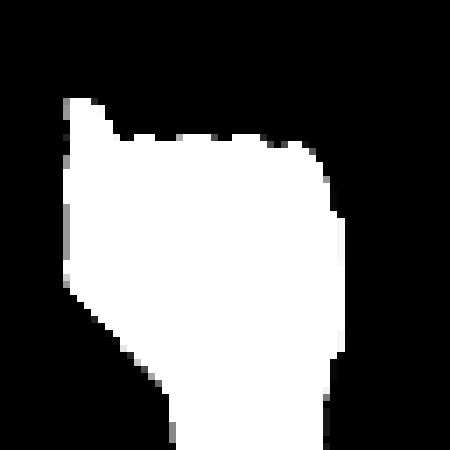

In [26]:
img

# Load the image,preprocess_it and predict

In [43]:
from skimage.transform import resize
import matplotlib.pyplot as plt
def detect(frame):
    img=resize(frame,(64,64,1))
    x=image.img_to_array(img)
    img=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(img))
    print(pred)
    op=['A','B','C','D','E','F','G','H','I']
    print(pred)
    print(op[pred])

1/1 [==============================] - 0s 103ms/step
0
0
A


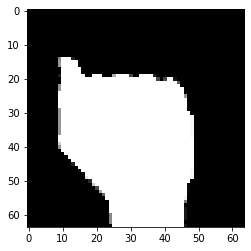

In [44]:
frame=cv2.imread(r'M:\software\AI_TRAINING_IBM\Projects_workspace\projectfiles\Dataset\test_set\A\1.png')
data=detect(frame)
plt.imshow(frame)